In [78]:
import scipy.io as sio
import numpy as np
import os
from os import getcwd
from os.path import join 
import matplotlib.pyplot as plt
import pandas as pd

In [79]:
fname = join(os.getcwd(),'data','data3SS2009.mat') # fname = caminho da pasta com arquivo

mat_contents = sio.loadmat(fname) # mat_contents carrega todos os dados do arquivo

dataset = mat_contents['dataset'] # Armazena os dados da coluna dataset

N, Chno, Nc = dataset.shape
# N: number of samples
# Chno: number of channels
# Nc: number of cases

y = mat_contents['labels'].reshape(Nc)

y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5

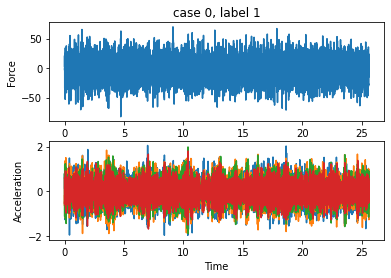

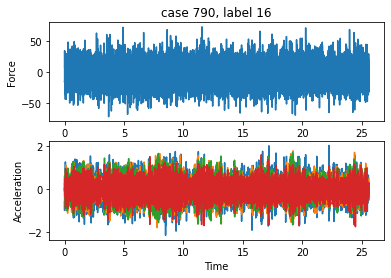

In [80]:
Ch1 = dataset[:,0,:] # célula de carga: força do shaker
Ch2 = dataset[:,1,:] # acelerômetro: base
Ch3 = dataset[:,2,:] # acelerômetro: 1o andar
Ch4 = dataset[:,3,:] # acelerômetro: 2o andar
Ch5 = dataset[:,4,:] # acelerômetro: 3o andar

Ts = 3.125 * 1e-3 # sampling time
time = (np.linspace(1,N,N) - 1) * Ts

for case in np.array([0,790]):
    plt.figure(case)
    plt.subplot(211)
    plt.title('case %d, label %d' % (case, y[case]))
    plt.plot(time,Ch1[:,case])
    plt.ylabel('Force')
    plt.subplot(212)
    plt.plot(time,Ch2[:,case],time,Ch3[:,case],time,Ch4[:,case],time,Ch5[:,case])
    plt.xlabel('Time')
    plt.ylabel('Acceleration')
    plt.show()

In [81]:
# Exercício 4.a.a

#loop feito para cada canal e cada sequência de medidas
#Importações indicadas no tutorial da página
# https://www.statsmodels.org/devel/generated/statsmodels.tsa.ar_model.AutoReg.html#statsmodels.tsa.ar_model.AutoReg

import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg  

Channels = [Ch2, Ch3, Ch4, Ch5]
X1 = []
n_lag = 30

for Channel in Channels:
    parameters = []
    for case in range(Nc):
        AR_Ch = AutoReg(Channel[:,case],lags=n_lag).fit()
        parameters.append(AR_Ch.params)
    parameters = np.vstack(tuple(parameters))
    print('Output shape = {}'.format(parameters.shape))
    X1.append(parameters)

X1 = np.hstack(X1)
X1.shape #Formato da matriz final

Output shape = (850, 31)
Output shape = (850, 31)
Output shape = (850, 31)
Output shape = (850, 31)


(850, 124)

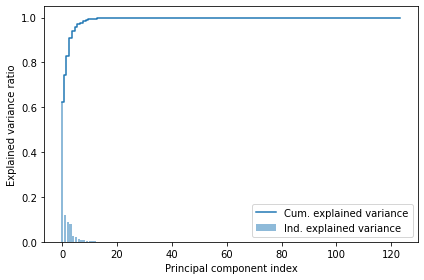

(850, 10)

In [82]:
# Exercício 4.a.b
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X1)

exp_var_pca = pca.explained_variance_ratio_
cum_sum_variance = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center',label='Ind. explained variance')
plt.step(range(0,len(cum_sum_variance)), cum_sum_variance, where='mid', label='Cum. explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

X1_reduced=pca.fit_transform(X1)
componentes=len(cum_sum_variance[cum_sum_variance<0.99])
X2=X1_reduced[:,0:componentes]
X2.shape

# X3 -> T2(T1(X3)) -> OUTPUT (1 a 17)

In [46]:
# Exercício 4.b

# Utilizando métodos descritos em:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler
# E no slide 12 da aula 2

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
X1s = scaler.fit_transform(X1)
X2s = scaler.fit_transform(X2)

indDam = y > 9

dfARed = pd.concat([pd.DataFrame(X1s),pd.DataFrame({'target':indDam})], axis=1)
dfPCA = pd.concat([pd.DataFrame(X2s),pd.DataFrame({'target':indDam})], axis=1)

dfPCA.describe()

,0,1,2,3,4,5,6,7,8,9
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,-0.252236,-0.312300,-0.234238,-0.012273,-0.129277,-0.010447,-0.085838,-0.070841,-0.195128,-0.051741
std,0.582294,0.450444,0.235347,0.427869,0.369069,0.354312,0.367903,0.350867,0.289218,0.342014
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.820990,-0.605487,-0.402430,-0.285883,-0.381873,-0.189913,-0.359643,-0.277146,-0.345575,-0.254795
50%,-0.425344,-0.470663,-0.246178,0.038969,-0.206845,-0.028918,-0.119966,-0.071913,-0.167205,-0.007364
75%,0.352590,-0.222251,-0.077246,0.292005,0.141888,0.149019,0.141957,0.119499,-0.040920,0.172722
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [105]:
# Parâmetros para teste
from sklearn.model_selection import train_test_split

pctHoldout = 0.4
kfolds =  5
nkiter = 50
n_search_iter = 10

X_train, X_test, y_train, y_test = train_test_split(X2s,y, test_size=pctHoldout, random_state=42) 
y_train, y_test = y_train-1, y_test-1 # O modelo considera 17 classes iniciando de 0. Foi necessário subtrair 1 de todas

In [106]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10,), random_state=1).fit(X_train,y_train)
y_predicted = clf.predict(X_test)



In [107]:
from sklearn.metrics import (accuracy_score)

accuracy_score(y_predicted,y_test)

0.9705882352941176

In [108]:
X_new = X_test[:3]
y_proba = clf.predict_proba(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0.]])

In [86]:
import tensorflow as tf
from tensorflow import keras

In [109]:
model = keras.models.Sequential([
keras.layers.InputLayer(input_shape=[10]), 
keras.layers.Dense(10, activation="relu"), #10 camadas ocultas
keras.layers.Dense(17, activation="softmax"), #17 estados 
])

model.summary() #Conforme esquema do livro de Geron, cap.10

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 10)                110       
                                                                 
 dense_17 (Dense)            (None, 17)                187       
                                                                 
Total params: 297 (1.16 KB)
Trainable params: 297 (1.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [115]:
# Geron, pág 232
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [116]:
history = model.fit(X_train, y_train, epochs = 10, validation_data=(X_test,y_test))

Epoch 1/10
16/16 [==============================] - 1s 21ms/step - loss: 2.7929 - accuracy: 0.1235 - val_loss: 2.7880 - val_accuracy: 0.0971
Epoch 2/10
16/16 [==============================] - 0s 7ms/step - loss: 2.7847 - accuracy: 0.1255 - val_loss: 2.7799 - val_accuracy: 0.0971
Epoch 3/10
16/16 [==============================] - 0s 6ms/step - loss: 2.7766 - accuracy: 0.1255 - val_loss: 2.7719 - val_accuracy: 0.0971
Epoch 4/10
16/16 [==============================] - 0s 7ms/step - loss: 2.7686 - accuracy: 0.1275 - val_loss: 2.7639 - val_accuracy: 0.0971
Epoch 5/10
16/16 [==============================] - 0s 6ms/step - loss: 2.7605 - accuracy: 0.1275 - val_loss: 2.7560 - val_accuracy: 0.0971
Epoch 6/10
16/16 [==============================] - 0s 7ms/step - loss: 2.7527 - accuracy: 0.1275 - val_loss: 2.7483 - val_accuracy: 0.0971
Epoch 7/10
16/16 [==============================] - 0s 7ms/step - loss: 2.7450 - accuracy: 0.1275 - val_loss: 2.7407 - val_accuracy: 0.0971
Epoch 8/10
16/16 [=

<function matplotlib.pyplot.show(*args, **kw)>

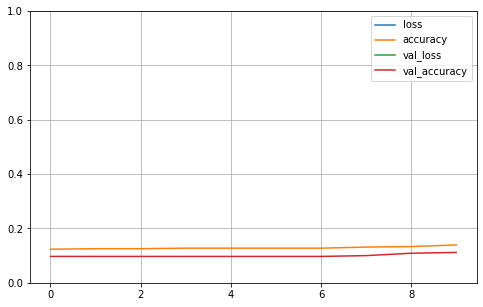

In [117]:
# A acurácia ficou bem baixa. 

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

In [119]:
# Aumentando o número de epochs

model_2 = keras.models.Sequential([
keras.layers.InputLayer(input_shape=[10]), 
keras.layers.Dense(10, activation="relu"),
keras.layers.Dense(17, activation="softmax"), 
])

model_2.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history_2 = model_2.fit(X_train, y_train, epochs=150, validation_split=0.05)

Epoch 1/150
16/16 [==============================] - 1s 16ms/step - loss: 2.8204 - accuracy: 0.0661 - val_loss: 2.7770 - val_accuracy: 0.0769
Epoch 2/150
16/16 [==============================] - 0s 5ms/step - loss: 2.8090 - accuracy: 0.0661 - val_loss: 2.7667 - val_accuracy: 0.0769
Epoch 3/150
16/16 [==============================] - 0s 5ms/step - loss: 2.7980 - accuracy: 0.0723 - val_loss: 2.7580 - val_accuracy: 0.0769
Epoch 4/150
16/16 [==============================] - 0s 5ms/step - loss: 2.7874 - accuracy: 0.0744 - val_loss: 2.7496 - val_accuracy: 0.0769
Epoch 5/150
16/16 [==============================] - 0s 5ms/step - loss: 2.7767 - accuracy: 0.0744 - val_loss: 2.7416 - val_accuracy: 0.0769
Epoch 6/150
16/16 [==============================] - 0s 5ms/step - loss: 2.7660 - accuracy: 0.0868 - val_loss: 2.7329 - val_accuracy: 0.0769
Epoch 7/150
16/16 [==============================] - 0s 5ms/step - loss: 2.7560 - accuracy: 0.0930 - val_loss: 2.7243 - val_accuracy: 0.0769
Epoch 8/150


Epoch 59/150
16/16 [==============================] - 0s 4ms/step - loss: 2.1684 - accuracy: 0.5847 - val_loss: 2.1828 - val_accuracy: 0.5769
Epoch 60/150
16/16 [==============================] - 0s 5ms/step - loss: 2.1536 - accuracy: 0.5888 - val_loss: 2.1687 - val_accuracy: 0.5769
Epoch 61/150
16/16 [==============================] - 0s 5ms/step - loss: 2.1388 - accuracy: 0.5950 - val_loss: 2.1559 - val_accuracy: 0.5769
Epoch 62/150
16/16 [==============================] - 0s 5ms/step - loss: 2.1242 - accuracy: 0.6033 - val_loss: 2.1417 - val_accuracy: 0.5769
Epoch 63/150
16/16 [==============================] - 0s 4ms/step - loss: 2.1094 - accuracy: 0.6074 - val_loss: 2.1284 - val_accuracy: 0.5769
Epoch 64/150
16/16 [==============================] - 0s 4ms/step - loss: 2.0948 - accuracy: 0.6033 - val_loss: 2.1149 - val_accuracy: 0.5769
Epoch 65/150
16/16 [==============================] - 0s 5ms/step - loss: 2.0799 - accuracy: 0.6095 - val_loss: 2.1002 - val_accuracy: 0.5769
Epoch 

16/16 [==============================] - 0s 4ms/step - loss: 1.3652 - accuracy: 0.7293 - val_loss: 1.4102 - val_accuracy: 0.6923
Epoch 117/150
16/16 [==============================] - 0s 4ms/step - loss: 1.3533 - accuracy: 0.7376 - val_loss: 1.3988 - val_accuracy: 0.6923
Epoch 118/150
16/16 [==============================] - 0s 4ms/step - loss: 1.3417 - accuracy: 0.7397 - val_loss: 1.3885 - val_accuracy: 0.6923
Epoch 119/150
16/16 [==============================] - 0s 4ms/step - loss: 1.3302 - accuracy: 0.7417 - val_loss: 1.3778 - val_accuracy: 0.7308
Epoch 120/150
16/16 [==============================] - 0s 5ms/step - loss: 1.3185 - accuracy: 0.7438 - val_loss: 1.3647 - val_accuracy: 0.6923
Epoch 121/150
16/16 [==============================] - 0s 4ms/step - loss: 1.3070 - accuracy: 0.7500 - val_loss: 1.3531 - val_accuracy: 0.7308
Epoch 122/150
16/16 [==============================] - 0s 5ms/step - loss: 1.2955 - accuracy: 0.7500 - val_loss: 1.3402 - val_accuracy: 0.7308
Epoch 123/150

<function matplotlib.pyplot.show(*args, **kw)>

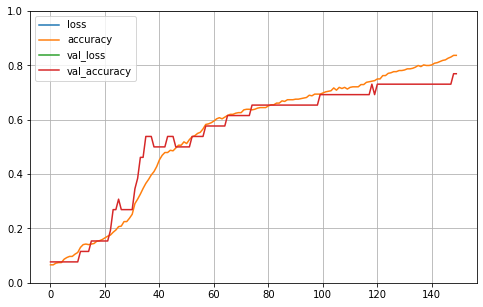

In [120]:
pd.DataFrame(history_2.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

In [121]:
# Ainda pode melhorar com mais epochs

# Aumentando o número de epochs

model_3 = keras.models.Sequential([
keras.layers.InputLayer(input_shape=[10]), 
keras.layers.Dense(10, activation="relu"),
keras.layers.Dense(17, activation="softmax"), 
])

model_3.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history_3 = model_3.fit(X_train, y_train, epochs=300, validation_split=0.05)

Epoch 1/300
16/16 [==============================] - 1s 20ms/step - loss: 2.8121 - accuracy: 0.0558 - val_loss: 2.8959 - val_accuracy: 0.0000e+00
Epoch 2/300
16/16 [==============================] - 0s 5ms/step - loss: 2.8003 - accuracy: 0.0579 - val_loss: 2.8880 - val_accuracy: 0.0000e+00
Epoch 3/300
16/16 [==============================] - 0s 4ms/step - loss: 2.7887 - accuracy: 0.0640 - val_loss: 2.8810 - val_accuracy: 0.0385
Epoch 4/300
16/16 [==============================] - 0s 5ms/step - loss: 2.7771 - accuracy: 0.0682 - val_loss: 2.8734 - val_accuracy: 0.0385
Epoch 5/300
16/16 [==============================] - 0s 5ms/step - loss: 2.7661 - accuracy: 0.0744 - val_loss: 2.8656 - val_accuracy: 0.0385
Epoch 6/300
16/16 [==============================] - 0s 5ms/step - loss: 2.7551 - accuracy: 0.0744 - val_loss: 2.8574 - val_accuracy: 0.0385
Epoch 7/300
16/16 [==============================] - 0s 5ms/step - loss: 2.7441 - accuracy: 0.0764 - val_loss: 2.8496 - val_accuracy: 0.0385
Epoc

Epoch 59/300
16/16 [==============================] - 0s 4ms/step - loss: 2.1722 - accuracy: 0.4587 - val_loss: 2.4276 - val_accuracy: 0.1538
Epoch 60/300
16/16 [==============================] - 0s 5ms/step - loss: 2.1584 - accuracy: 0.4649 - val_loss: 2.4167 - val_accuracy: 0.1538
Epoch 61/300
16/16 [==============================] - 0s 5ms/step - loss: 2.1452 - accuracy: 0.4690 - val_loss: 2.4060 - val_accuracy: 0.1538
Epoch 62/300
16/16 [==============================] - 0s 4ms/step - loss: 2.1318 - accuracy: 0.4835 - val_loss: 2.3936 - val_accuracy: 0.1923
Epoch 63/300
16/16 [==============================] - 0s 5ms/step - loss: 2.1184 - accuracy: 0.5000 - val_loss: 2.3822 - val_accuracy: 0.1923
Epoch 64/300
16/16 [==============================] - 0s 5ms/step - loss: 2.1049 - accuracy: 0.5083 - val_loss: 2.3704 - val_accuracy: 0.2308
Epoch 65/300
16/16 [==============================] - 0s 5ms/step - loss: 2.0913 - accuracy: 0.5269 - val_loss: 2.3587 - val_accuracy: 0.2692
Epoch 

16/16 [==============================] - 0s 5ms/step - loss: 1.3983 - accuracy: 0.7769 - val_loss: 1.6961 - val_accuracy: 0.6154
Epoch 117/300
16/16 [==============================] - 0s 5ms/step - loss: 1.3861 - accuracy: 0.7769 - val_loss: 1.6841 - val_accuracy: 0.6154
Epoch 118/300
16/16 [==============================] - 0s 5ms/step - loss: 1.3738 - accuracy: 0.7789 - val_loss: 1.6697 - val_accuracy: 0.6154
Epoch 119/300
16/16 [==============================] - 0s 4ms/step - loss: 1.3617 - accuracy: 0.7810 - val_loss: 1.6590 - val_accuracy: 0.6154
Epoch 120/300
16/16 [==============================] - 0s 4ms/step - loss: 1.3497 - accuracy: 0.7872 - val_loss: 1.6473 - val_accuracy: 0.6154
Epoch 121/300
16/16 [==============================] - 0s 5ms/step - loss: 1.3380 - accuracy: 0.7872 - val_loss: 1.6350 - val_accuracy: 0.6154
Epoch 122/300
16/16 [==============================] - 0s 6ms/step - loss: 1.3262 - accuracy: 0.7851 - val_loss: 1.6209 - val_accuracy: 0.6154
Epoch 123/300

16/16 [==============================] - 0s 4ms/step - loss: 0.8469 - accuracy: 0.8450 - val_loss: 0.9998 - val_accuracy: 0.7308
Epoch 174/300
16/16 [==============================] - 0s 4ms/step - loss: 0.8398 - accuracy: 0.8450 - val_loss: 0.9903 - val_accuracy: 0.7308
Epoch 175/300
16/16 [==============================] - 0s 4ms/step - loss: 0.8327 - accuracy: 0.8450 - val_loss: 0.9801 - val_accuracy: 0.7308
Epoch 176/300
16/16 [==============================] - 0s 5ms/step - loss: 0.8259 - accuracy: 0.8450 - val_loss: 0.9716 - val_accuracy: 0.7308
Epoch 177/300
16/16 [==============================] - 0s 4ms/step - loss: 0.8191 - accuracy: 0.8430 - val_loss: 0.9604 - val_accuracy: 0.7308
Epoch 178/300
16/16 [==============================] - 0s 6ms/step - loss: 0.8121 - accuracy: 0.8450 - val_loss: 0.9506 - val_accuracy: 0.7308
Epoch 179/300
16/16 [==============================] - 0s 5ms/step - loss: 0.8057 - accuracy: 0.8492 - val_loss: 0.9441 - val_accuracy: 0.7308
Epoch 180/300

16/16 [==============================] - 0s 4ms/step - loss: 0.5545 - accuracy: 0.9256 - val_loss: 0.5923 - val_accuracy: 0.8846
Epoch 231/300
16/16 [==============================] - 0s 5ms/step - loss: 0.5509 - accuracy: 0.9236 - val_loss: 0.5853 - val_accuracy: 0.8846
Epoch 232/300
16/16 [==============================] - 0s 5ms/step - loss: 0.5477 - accuracy: 0.9236 - val_loss: 0.5840 - val_accuracy: 0.8846
Epoch 233/300
16/16 [==============================] - 0s 5ms/step - loss: 0.5445 - accuracy: 0.9236 - val_loss: 0.5801 - val_accuracy: 0.8846
Epoch 234/300
16/16 [==============================] - 0s 5ms/step - loss: 0.5411 - accuracy: 0.9194 - val_loss: 0.5743 - val_accuracy: 0.8846
Epoch 235/300
16/16 [==============================] - 0s 5ms/step - loss: 0.5377 - accuracy: 0.9236 - val_loss: 0.5680 - val_accuracy: 0.8846
Epoch 236/300
16/16 [==============================] - 0s 5ms/step - loss: 0.5344 - accuracy: 0.9236 - val_loss: 0.5651 - val_accuracy: 0.8846
Epoch 237/300

16/16 [==============================] - 0s 5ms/step - loss: 0.4099 - accuracy: 0.9339 - val_loss: 0.4199 - val_accuracy: 0.8846
Epoch 288/300
16/16 [==============================] - 0s 6ms/step - loss: 0.4080 - accuracy: 0.9339 - val_loss: 0.4138 - val_accuracy: 0.8846
Epoch 289/300
16/16 [==============================] - 0s 5ms/step - loss: 0.4061 - accuracy: 0.9339 - val_loss: 0.4116 - val_accuracy: 0.8846
Epoch 290/300
16/16 [==============================] - 0s 5ms/step - loss: 0.4045 - accuracy: 0.9318 - val_loss: 0.4104 - val_accuracy: 0.8846
Epoch 291/300
16/16 [==============================] - 0s 4ms/step - loss: 0.4027 - accuracy: 0.9318 - val_loss: 0.4093 - val_accuracy: 0.8846
Epoch 292/300
16/16 [==============================] - 0s 4ms/step - loss: 0.4010 - accuracy: 0.9339 - val_loss: 0.4080 - val_accuracy: 0.8846
Epoch 293/300
16/16 [==============================] - 0s 4ms/step - loss: 0.3994 - accuracy: 0.9339 - val_loss: 0.4034 - val_accuracy: 0.8846
Epoch 294/300

<function matplotlib.pyplot.show(*args, **kw)>

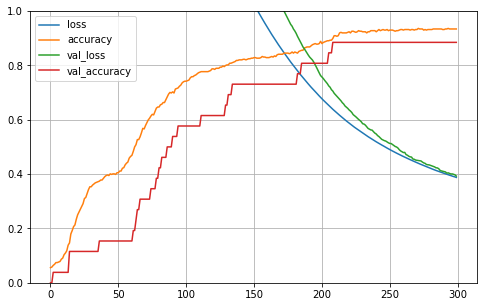

In [122]:
pd.DataFrame(history_3.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

In [125]:
# Parece estar convergindo para um máximo próximo a 93%. Mais um teste com 600 epochs

model_4 = keras.models.Sequential([
keras.layers.InputLayer(input_shape=[10]), 
keras.layers.Dense(10, activation="relu"),
keras.layers.Dense(17, activation="softmax"), 
])

model_4.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history_4 = model_4.fit(X_train, y_train, epochs=1000, validation_split=0.05)

Epoch 1/1000
16/16 [==============================] - 1s 14ms/step - loss: 2.8096 - accuracy: 0.0640 - val_loss: 2.8026 - val_accuracy: 0.0000e+00
Epoch 2/1000
16/16 [==============================] - 0s 5ms/step - loss: 2.7974 - accuracy: 0.0847 - val_loss: 2.7942 - val_accuracy: 0.0000e+00
Epoch 3/1000
16/16 [==============================] - 0s 5ms/step - loss: 2.7855 - accuracy: 0.1074 - val_loss: 2.7873 - val_accuracy: 0.0385
Epoch 4/1000
16/16 [==============================] - 0s 5ms/step - loss: 2.7741 - accuracy: 0.1136 - val_loss: 2.7795 - val_accuracy: 0.0385
Epoch 5/1000
16/16 [==============================] - 0s 5ms/step - loss: 2.7626 - accuracy: 0.1157 - val_loss: 2.7712 - val_accuracy: 0.0385
Epoch 6/1000
16/16 [==============================] - 0s 5ms/step - loss: 2.7521 - accuracy: 0.1157 - val_loss: 2.7641 - val_accuracy: 0.0385
Epoch 7/1000
16/16 [==============================] - 0s 5ms/step - loss: 2.7414 - accuracy: 0.1281 - val_loss: 2.7555 - val_accuracy: 0.03

16/16 [==============================] - 0s 5ms/step - loss: 2.2433 - accuracy: 0.4690 - val_loss: 2.3585 - val_accuracy: 0.3846
Epoch 59/1000
16/16 [==============================] - 0s 5ms/step - loss: 2.2328 - accuracy: 0.4773 - val_loss: 2.3494 - val_accuracy: 0.3846
Epoch 60/1000
16/16 [==============================] - 0s 5ms/step - loss: 2.2221 - accuracy: 0.4814 - val_loss: 2.3399 - val_accuracy: 0.3846
Epoch 61/1000
16/16 [==============================] - 0s 5ms/step - loss: 2.2114 - accuracy: 0.4793 - val_loss: 2.3304 - val_accuracy: 0.3846
Epoch 62/1000
16/16 [==============================] - 0s 4ms/step - loss: 2.2004 - accuracy: 0.4793 - val_loss: 2.3203 - val_accuracy: 0.3846
Epoch 63/1000
16/16 [==============================] - 0s 5ms/step - loss: 2.1895 - accuracy: 0.4876 - val_loss: 2.3107 - val_accuracy: 0.3846
Epoch 64/1000
16/16 [==============================] - 0s 5ms/step - loss: 2.1785 - accuracy: 0.4959 - val_loss: 2.3015 - val_accuracy: 0.3846
Epoch 65/1000

16/16 [==============================] - 0s 5ms/step - loss: 1.6034 - accuracy: 0.6756 - val_loss: 1.7333 - val_accuracy: 0.5769
Epoch 116/1000
16/16 [==============================] - 0s 5ms/step - loss: 1.5926 - accuracy: 0.6839 - val_loss: 1.7219 - val_accuracy: 0.5769
Epoch 117/1000
16/16 [==============================] - 0s 5ms/step - loss: 1.5817 - accuracy: 0.6839 - val_loss: 1.7113 - val_accuracy: 0.5769
Epoch 118/1000
16/16 [==============================] - 0s 5ms/step - loss: 1.5708 - accuracy: 0.6983 - val_loss: 1.6991 - val_accuracy: 0.6154
Epoch 119/1000
16/16 [==============================] - 0s 4ms/step - loss: 1.5602 - accuracy: 0.7045 - val_loss: 1.6879 - val_accuracy: 0.6538
Epoch 120/1000
16/16 [==============================] - 0s 5ms/step - loss: 1.5493 - accuracy: 0.7025 - val_loss: 1.6766 - val_accuracy: 0.6538
Epoch 121/1000
16/16 [==============================] - 0s 5ms/step - loss: 1.5386 - accuracy: 0.7107 - val_loss: 1.6660 - val_accuracy: 0.6538
Epoch 1

Epoch 172/1000
16/16 [==============================] - 0s 5ms/step - loss: 1.0502 - accuracy: 0.8740 - val_loss: 1.1625 - val_accuracy: 0.7692
Epoch 173/1000
16/16 [==============================] - 0s 5ms/step - loss: 1.0422 - accuracy: 0.8760 - val_loss: 1.1559 - val_accuracy: 0.7692
Epoch 174/1000
16/16 [==============================] - 0s 5ms/step - loss: 1.0342 - accuracy: 0.8719 - val_loss: 1.1459 - val_accuracy: 0.7692
Epoch 175/1000
16/16 [==============================] - 0s 5ms/step - loss: 1.0258 - accuracy: 0.8740 - val_loss: 1.1395 - val_accuracy: 0.7692
Epoch 176/1000
16/16 [==============================] - 0s 5ms/step - loss: 1.0179 - accuracy: 0.8760 - val_loss: 1.1315 - val_accuracy: 0.7692
Epoch 177/1000
16/16 [==============================] - 0s 5ms/step - loss: 1.0099 - accuracy: 0.8760 - val_loss: 1.1233 - val_accuracy: 0.7692
Epoch 178/1000
16/16 [==============================] - 0s 5ms/step - loss: 1.0020 - accuracy: 0.8781 - val_loss: 1.1165 - val_accuracy:

Epoch 229/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.6852 - accuracy: 0.8967 - val_loss: 0.8016 - val_accuracy: 0.8077
Epoch 230/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.6811 - accuracy: 0.8967 - val_loss: 0.7979 - val_accuracy: 0.8077
Epoch 231/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.6762 - accuracy: 0.8988 - val_loss: 0.7928 - val_accuracy: 0.8462
Epoch 232/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.6718 - accuracy: 0.8988 - val_loss: 0.7863 - val_accuracy: 0.8462
Epoch 233/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.6671 - accuracy: 0.8988 - val_loss: 0.7806 - val_accuracy: 0.8462
Epoch 234/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.6628 - accuracy: 0.8988 - val_loss: 0.7759 - val_accuracy: 0.8462
Epoch 235/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.6585 - accuracy: 0.8988 - val_loss: 0.7719 - val_accuracy:

Epoch 286/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.4893 - accuracy: 0.9091 - val_loss: 0.5900 - val_accuracy: 0.8462
Epoch 287/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.4869 - accuracy: 0.9091 - val_loss: 0.5861 - val_accuracy: 0.8462
Epoch 288/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.4844 - accuracy: 0.9112 - val_loss: 0.5832 - val_accuracy: 0.8462
Epoch 289/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.4820 - accuracy: 0.9112 - val_loss: 0.5777 - val_accuracy: 0.8462
Epoch 290/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.4795 - accuracy: 0.9174 - val_loss: 0.5745 - val_accuracy: 0.8462
Epoch 291/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.4768 - accuracy: 0.9174 - val_loss: 0.5723 - val_accuracy: 0.8462
Epoch 292/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.4746 - accuracy: 0.9174 - val_loss: 0.5674 - val_accuracy:

Epoch 343/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.3774 - accuracy: 0.9194 - val_loss: 0.4441 - val_accuracy: 0.8462
Epoch 344/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.3759 - accuracy: 0.9194 - val_loss: 0.4424 - val_accuracy: 0.8462
Epoch 345/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.3745 - accuracy: 0.9194 - val_loss: 0.4414 - val_accuracy: 0.8462
Epoch 346/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.3729 - accuracy: 0.9236 - val_loss: 0.4389 - val_accuracy: 0.8462
Epoch 347/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.3715 - accuracy: 0.9236 - val_loss: 0.4377 - val_accuracy: 0.8462
Epoch 348/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.3700 - accuracy: 0.9236 - val_loss: 0.4336 - val_accuracy: 0.8462
Epoch 349/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.3687 - accuracy: 0.9215 - val_loss: 0.4318 - val_accuracy:

Epoch 400/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.3058 - accuracy: 0.9421 - val_loss: 0.3386 - val_accuracy: 0.8846
Epoch 401/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.3049 - accuracy: 0.9380 - val_loss: 0.3375 - val_accuracy: 0.8846
Epoch 402/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.3040 - accuracy: 0.9380 - val_loss: 0.3344 - val_accuracy: 0.8846
Epoch 403/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.3028 - accuracy: 0.9401 - val_loss: 0.3338 - val_accuracy: 0.8846
Epoch 404/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.3018 - accuracy: 0.9421 - val_loss: 0.3318 - val_accuracy: 0.8846
Epoch 405/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.3008 - accuracy: 0.9421 - val_loss: 0.3310 - val_accuracy: 0.8846
Epoch 406/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.2998 - accuracy: 0.9401 - val_loss: 0.3301 - val_accuracy:

Epoch 457/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.2571 - accuracy: 0.9628 - val_loss: 0.2752 - val_accuracy: 0.9231
Epoch 458/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.2566 - accuracy: 0.9566 - val_loss: 0.2753 - val_accuracy: 0.9231
Epoch 459/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.2560 - accuracy: 0.9545 - val_loss: 0.2750 - val_accuracy: 0.9231
Epoch 460/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.2552 - accuracy: 0.9566 - val_loss: 0.2725 - val_accuracy: 0.9231
Epoch 461/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.2546 - accuracy: 0.9587 - val_loss: 0.2683 - val_accuracy: 0.9231
Epoch 462/1000
16/16 [==============================] - 0s 6ms/step - loss: 0.2537 - accuracy: 0.9607 - val_loss: 0.2675 - val_accuracy: 0.9231
Epoch 463/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.2530 - accuracy: 0.9607 - val_loss: 0.2672 - val_accuracy:

Epoch 514/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.2224 - accuracy: 0.9690 - val_loss: 0.2143 - val_accuracy: 0.9615
Epoch 515/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.2219 - accuracy: 0.9690 - val_loss: 0.2150 - val_accuracy: 0.9615
Epoch 516/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.2213 - accuracy: 0.9690 - val_loss: 0.2157 - val_accuracy: 0.9615
Epoch 517/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.2206 - accuracy: 0.9690 - val_loss: 0.2149 - val_accuracy: 0.9615
Epoch 518/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.2200 - accuracy: 0.9669 - val_loss: 0.2137 - val_accuracy: 0.9615
Epoch 519/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.2194 - accuracy: 0.9690 - val_loss: 0.2143 - val_accuracy: 0.9615
Epoch 520/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.2190 - accuracy: 0.9711 - val_loss: 0.2144 - val_accuracy:

Epoch 571/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1953 - accuracy: 0.9731 - val_loss: 0.1777 - val_accuracy: 0.9615
Epoch 572/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.1953 - accuracy: 0.9731 - val_loss: 0.1750 - val_accuracy: 0.9615
Epoch 573/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1950 - accuracy: 0.9731 - val_loss: 0.1782 - val_accuracy: 0.9615
Epoch 574/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1942 - accuracy: 0.9731 - val_loss: 0.1794 - val_accuracy: 0.9615
Epoch 575/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.1938 - accuracy: 0.9731 - val_loss: 0.1796 - val_accuracy: 0.9615
Epoch 576/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.1934 - accuracy: 0.9731 - val_loss: 0.1780 - val_accuracy: 0.9615
Epoch 577/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1930 - accuracy: 0.9711 - val_loss: 0.1793 - val_accuracy:

Epoch 628/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1749 - accuracy: 0.9731 - val_loss: 0.1591 - val_accuracy: 0.9615
Epoch 629/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.1746 - accuracy: 0.9711 - val_loss: 0.1606 - val_accuracy: 0.9615
Epoch 630/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1742 - accuracy: 0.9731 - val_loss: 0.1572 - val_accuracy: 0.9615
Epoch 631/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1739 - accuracy: 0.9731 - val_loss: 0.1564 - val_accuracy: 0.9615
Epoch 632/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1736 - accuracy: 0.9711 - val_loss: 0.1598 - val_accuracy: 0.9615
Epoch 633/1000
16/16 [==============================] - 0s 8ms/step - loss: 0.1733 - accuracy: 0.9731 - val_loss: 0.1587 - val_accuracy: 0.9615
Epoch 634/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.1731 - accuracy: 0.9711 - val_loss: 0.1573 - val_accuracy:

Epoch 685/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1587 - accuracy: 0.9711 - val_loss: 0.1348 - val_accuracy: 0.9615
Epoch 686/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1585 - accuracy: 0.9731 - val_loss: 0.1352 - val_accuracy: 0.9615
Epoch 687/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.1581 - accuracy: 0.9731 - val_loss: 0.1356 - val_accuracy: 0.9615
Epoch 688/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1579 - accuracy: 0.9731 - val_loss: 0.1328 - val_accuracy: 0.9615
Epoch 689/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1577 - accuracy: 0.9752 - val_loss: 0.1333 - val_accuracy: 0.9615
Epoch 690/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1575 - accuracy: 0.9752 - val_loss: 0.1306 - val_accuracy: 0.9615
Epoch 691/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1573 - accuracy: 0.9752 - val_loss: 0.1288 - val_accuracy:

Epoch 742/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1456 - accuracy: 0.9752 - val_loss: 0.1170 - val_accuracy: 0.9615
Epoch 743/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1453 - accuracy: 0.9752 - val_loss: 0.1162 - val_accuracy: 0.9615
Epoch 744/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.1454 - accuracy: 0.9752 - val_loss: 0.1179 - val_accuracy: 0.9615
Epoch 745/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1450 - accuracy: 0.9752 - val_loss: 0.1185 - val_accuracy: 0.9615
Epoch 746/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1448 - accuracy: 0.9752 - val_loss: 0.1186 - val_accuracy: 0.9615
Epoch 747/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1447 - accuracy: 0.9752 - val_loss: 0.1190 - val_accuracy: 0.9615
Epoch 748/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1443 - accuracy: 0.9752 - val_loss: 0.1189 - val_accuracy:

Epoch 799/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1348 - accuracy: 0.9773 - val_loss: 0.1082 - val_accuracy: 0.9615
Epoch 800/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1348 - accuracy: 0.9773 - val_loss: 0.1080 - val_accuracy: 0.9615
Epoch 801/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1346 - accuracy: 0.9773 - val_loss: 0.1071 - val_accuracy: 0.9615
Epoch 802/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1345 - accuracy: 0.9752 - val_loss: 0.1054 - val_accuracy: 0.9615
Epoch 803/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.1343 - accuracy: 0.9773 - val_loss: 0.1049 - val_accuracy: 0.9615
Epoch 804/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1342 - accuracy: 0.9773 - val_loss: 0.1054 - val_accuracy: 0.9615
Epoch 805/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1338 - accuracy: 0.9773 - val_loss: 0.1056 - val_accuracy:

Epoch 856/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1261 - accuracy: 0.9793 - val_loss: 0.0958 - val_accuracy: 0.9615
Epoch 857/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1260 - accuracy: 0.9793 - val_loss: 0.0966 - val_accuracy: 0.9615
Epoch 858/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1258 - accuracy: 0.9793 - val_loss: 0.0971 - val_accuracy: 0.9615
Epoch 859/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.1255 - accuracy: 0.9793 - val_loss: 0.0989 - val_accuracy: 0.9615
Epoch 860/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.1255 - accuracy: 0.9793 - val_loss: 0.0983 - val_accuracy: 0.9615
Epoch 861/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.1253 - accuracy: 0.9793 - val_loss: 0.0990 - val_accuracy: 0.9615
Epoch 862/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1252 - accuracy: 0.9793 - val_loss: 0.0967 - val_accuracy:

Epoch 913/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1187 - accuracy: 0.9793 - val_loss: 0.0887 - val_accuracy: 0.9615
Epoch 914/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1185 - accuracy: 0.9793 - val_loss: 0.0890 - val_accuracy: 0.9615
Epoch 915/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1185 - accuracy: 0.9793 - val_loss: 0.0895 - val_accuracy: 0.9615
Epoch 916/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1182 - accuracy: 0.9793 - val_loss: 0.0928 - val_accuracy: 0.9615
Epoch 917/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1182 - accuracy: 0.9793 - val_loss: 0.0919 - val_accuracy: 0.9615
Epoch 918/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1181 - accuracy: 0.9793 - val_loss: 0.0880 - val_accuracy: 0.9615
Epoch 919/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.1180 - accuracy: 0.9793 - val_loss: 0.0850 - val_accuracy:

Epoch 970/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1122 - accuracy: 0.9793 - val_loss: 0.0829 - val_accuracy: 0.9615
Epoch 971/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.1120 - accuracy: 0.9793 - val_loss: 0.0842 - val_accuracy: 0.9615
Epoch 972/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1120 - accuracy: 0.9793 - val_loss: 0.0840 - val_accuracy: 0.9615
Epoch 973/1000
16/16 [==============================] - 0s 6ms/step - loss: 0.1119 - accuracy: 0.9793 - val_loss: 0.0839 - val_accuracy: 0.9615
Epoch 974/1000
16/16 [==============================] - 0s 5ms/step - loss: 0.1117 - accuracy: 0.9793 - val_loss: 0.0833 - val_accuracy: 0.9615
Epoch 975/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.1117 - accuracy: 0.9793 - val_loss: 0.0831 - val_accuracy: 0.9615
Epoch 976/1000
16/16 [==============================] - 0s 4ms/step - loss: 0.1115 - accuracy: 0.9793 - val_loss: 0.0852 - val_accuracy:

<function matplotlib.pyplot.show(*args, **kw)>

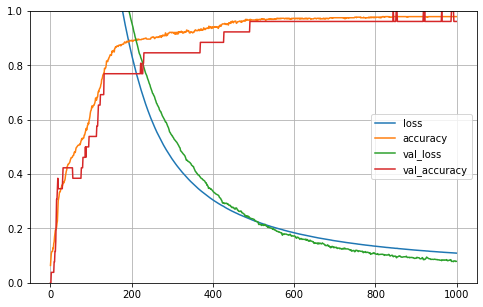

In [126]:
pd.DataFrame(history_4.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

In [ ]:
# Com 600 epochs e 1000 epochs, a precisão ficou próxima a 98%, muito similar aos outros métodos até agora.